# Гравиметры

## Маятниковые гравиметры абсолютных измерений

Измерение абсолютного значения силы тяжести основаны на том, что период колебаний \\( T \\) у маятника зависит от величины поля, в котором совершаются эти колебания. Математическим аппаратом, описывающим данную зависимость, является формула: 

$$ T = 2\pi\sqrt{\frac{l}{g}} $$

Однако на точность вычислений силы тяжести, в результате, будут оказывать влияние точность измерения длины маятника, а также масса груза. Для решения этой проблемы Ф. В. Бессель предложил измерять периоды колебаний \\( T_1 \\) и \\( T_2 \\) одного и того же маятника при разной длине нити \\( l_1 \\) и \\( l_2 \\). Для расчётов необходимо использовать формулу:

$$ g = 4\pi^2\frac{l_1-l_2}{T^2_1-T^2_2} $$

Преимущество данного подхода заключается в том, что измерить разность длин маятников можно значительно точнее и проще, чем сами длины маятников. Точность измерения может составить 0,3 мГал.

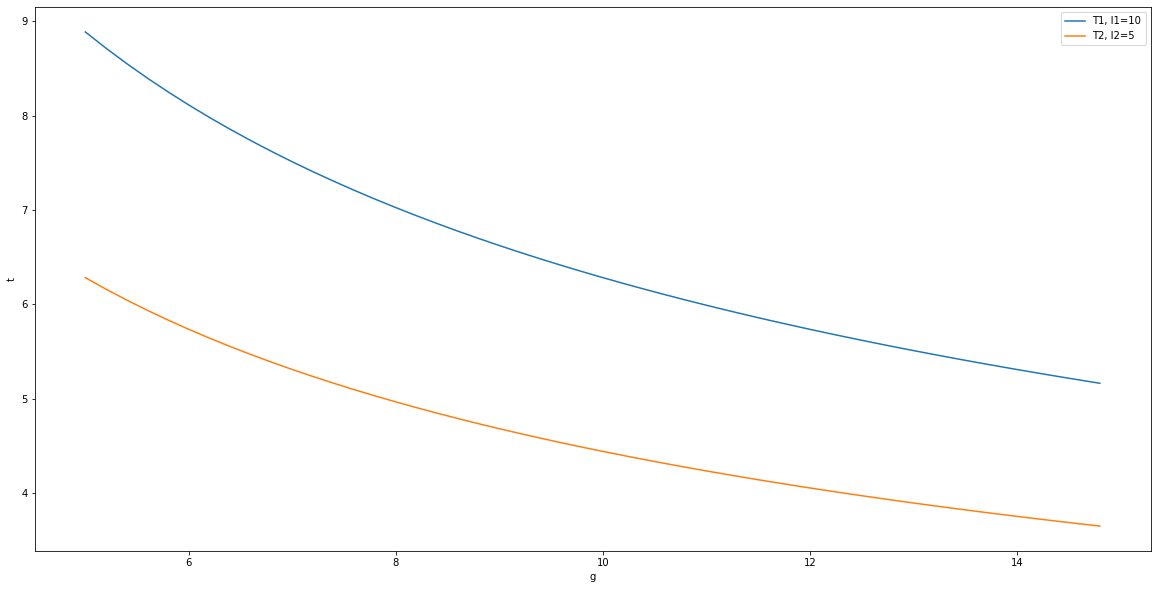

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sage

def rangeT(l):
    t = np.arange(5,15,0.2)
    T = []
    for i in t:
        T.append(2*np.pi * np.sqrt(l/i))
    return T

def rangeG(l1,l2,T1, T2):
    g = []
    for i in range(len(T1)):
        g.append((4*(np.pi**2) * (l1-l2))/((T1[i]*T1[i]) - (T2[i]*T2[i])))
    return g

nano = 10**(-7)
alpha = 380 * nano
l1 = 10
l2 = 5

T1 = rangeT(l1)
T2 = rangeT(l2)
g = rangeG(l1,l2,T1,T2)

#T1 = 2*np.pi * np.sqrt(l1/g)
#T2 = 2*np.pi * np.sqrt(l2/g)
#g = (4*(np.pi**2) * (l1-l2))/((T1*T1) - (T2*T2))
plt.figure(figsize=(20, 10))
p1, = plt.plot(g,T1)
p2, = plt.plot(g,T2)
plt.legend([p1,p2],['T1, l1=10','T2, l2=5'])
plt.ylabel('t')
plt.xlabel('g')
plt.show()

График зависимости колебаний от силы притяжения.

## Баллистические гравиметры

Измерение абсолютного значения силы тяжести основано на регистрации времени свободного падения некоторого пробного тела известной массы. Математическим аппаратом, описывающим данную зависимость, является формула:

$$ z = z_0 + v_0t + \frac{gt^2}{2}$$

Величины \\( z_0 \\) — начальная высота, \\( v_0 \\) — начальная скорость заранее известны, соответственно, измерив положение тела \\( z \\) и время \\( t \\) в нескольких положениях, можно составить систему уравнений:

\begin{cases}
    z_1 = z_0 + v_0t_1 + \frac{gt_1^2}{2}\\
    z_2 = z_0 + v_0t_2 + \frac{gt_2^2}{2}\\
    z_3 = z_0 + v_0t_3 + \frac{gt_3^2}{2}
\end{cases}

Измерения координаты тела осуществляется с помощью лазерного дальномера, а для увеличения точности вводят поправку на время запаздывания определения координат из-за физических процессов в приборе.

Для ещё большего увеличения точности могут усложнять математический аппарат, учитывая неоднородность самого гравитационного поля (свободно падающий груз меняет свою абсолютную высоту, а на разной высоте разное нормальное значения силы тяжести). Поэтому на практике распространена следующая формула:

$$ z_i = z_0 + v_0t_i + \frac{gt_i^2}{2} + \frac{gt_i^3}{6} + \frac{gt_i^4}{24}$$

где \\( \gamma \\) — вертикальный градиент силы тяжести на текущем пикете.

Фактически, в гравиметрах типа ГАБЛ-Э во время одного свободного падения измерений производят не три раза, а несколько сотен раз. Это позволяет статистическими методами определить наиболее вероятное значение силы тяжести. Для этого применяется следующая формула:

$$g = \frac{2}{\Delta}
\begin{vmatrix}
  N & \sum{t_i} & \sum{S_i - \frac{1}{6}\gamma(v_0t_i^3 + \frac{1}{4}gt_i^4)} \\
  \sum{t_i} & \sum{t_i^2} & \sum{[S_i - \frac{1}{6}\gamma(v_0t_i^3 + \frac{1}{4}gt_i^4)]t_i} \\
  \sum{t_i^2} & \sum{t_i^3} & \sum{[S_i - \frac{1}{6}\gamma(v_0t_i^3 + \frac{1}{4}gt_i^4)]t_i^2}
 \end{vmatrix}
$$

где \\( N \\) — количество измерений, а величина \\( \Delta \\)  определяется выражением:

$$\Delta = 
\begin{vmatrix}
  N & \sum{t_i} & \sum{t_i^2} \\
  \sum{t_i} & \sum{t_i^2} & \sum{t_i^3} \\
  \sum{t_i^2} & \sum{t_i^3} & \sum{t_i^4}
 \end{vmatrix}
$$

Визуально основная часть гравиметра представляет собой короткую трубку, из которой откачан воздух. Специальный механизм сверху вниз по трубке бросает шарик известной массы, а нижний механизм (так называемая «юбка») ловит шарик внизу, когда тот вылетает из трубки. Затем механизм возвращает шарик обратно к верхней части трубы и снова бросает. Во время падения лазерный луч многократно измеряет координаты шарика в трубе.

## Решение прямой задачи в общем виде

Аномалии силы тяжести, вызванные притяжением тел известной формы, размера и избыточной плотности, рассчитывают на основе закона всемирного тяготения (закона Ньютона). Для этого гравитирующее тело разбивают на элементарные массы \\( dm \\); рассчитывают аномалию такой точечной массы \\( \Delta g_1 \\), которая равна вертикальной составляющей силы ньютоновского притяжения \\( F_1 \\) этой массой массы 1 г, находящейся в точке наблюдения \\( A \\), т. е. берут составляющую силы притяжения по направлению действия силы тяжести Земли \\( g \\); наконец, используя принцип суперпозиции, определяют аномалию за счет притяжения всем телом \\( \Delta g_T \\), как сумму притяжении всех элементарных точечных масс, которыми можно представить аномалообразующее тело.

Математически сказанное можно записать так. Согласно выражению \\( F_1 = G\frac{dm}{r^2}\\) , \\( \Delta g_1 = F_1 \cdot cos\alpha = G \cdot dm\frac{\bar z-z}{r^2} \\) ,где 
$$ cos\alpha = \frac{\bar z-z}{r}, r=\sqrt{(\bar x-x)^2+(\bar y-y)^2+(\bar{z}-z)^2} $$ - расстояние между точкой наблюдения \\(А (х, у, z)\\) и точкой \\(M( x,y,z )\\), в которой находится элементарная точечная масса. В природных условиях аномальные включения с плотностью \\(\sigma\\) находятся во вмещающей среде с плотностью \\(\sigma_0\\), поэтому под массой \\(dm\\) надо понимать избыточную массу \\(dm = (\sigma — \sigma_0) \space dV =\Delta\sigma \space dV\\), где \\(dV\\)—элементарный объем точечной массы; \\(\Delta\sigma\\) — избыточная плотность. Поэтому окончательные выражения для расчета аномалии силы тяжести точечной массы и тела, используемые в теории гравиразведки, имеют вид
$$\Delta g_1=G \cdot \Delta\sigma\frac{\bar z - z}{r^3} dV, \Delta g_T= \int_v \frac{\Delta\sigma(\bar z - z)dV}{[(\bar x-x)^2+(\bar y-y)^2+(\bar{z}-z)^2]^\frac{3}{2}}$$ Уравнение 1.1

Интеграл в последней формуле берут по всему объему тела \\(V\\). При \\(\sigma > \sigma_0 \space \Delta g_T\\) имеет положительный знак, т. е. наблюдаются увеличение притяжения и положительные аномалии. При \\(\sigma < \sigma_0 \space \Delta g_T\\) имеет отрицательный знак, т. е. наблюдаются уменьшение притяжения и отрицательные аномалии.



## Прямая задача для шара

Пусть однородный шар радиусом \\(R\\), объемом \\(V\\), с избыточной плотностью \\(\Delta\sigma\\) расположен на оси \\(Z\\) на глубине \\(h\\), а). Решим прямую задачу, т. е. определим гравитационный эффект вдоль наземного профиля \\(ОХ\\), проходящего через проекцию центра шара с началом координат над ним. Поскольку по закону всемирного тяготения шар притягивается с такой же силой, как точечная масса, сосредоточенная в его центре, аномалию над шаром Δgш можно получить без решения интеграла, считая, что аномалия силы тяжести над шаром и аномалия точечной массы, помещенной в его центре, совпадают:

$$\Delta g_ш = \Delta g_1 = G \cdot \Delta\sigma \cdot V\frac{h}{r^3} = \frac{GMh}{(x^2+h^2)^{3/2}}$$

где \\(M= Δσ V\\) —избыточная масса шара. График \\(\Delta g_ш\\) будет иметь максимум над центром шара \\(\Delta g_{max} = \frac{GM}{h^2}\\) (при х=0) и асимптотически стремиться к нулю при \\(х → ± ∞\\). Знак \\(\Delta g_ш\\) определяется знаком \\(\Delta\sigma\\). Формула для второй производной потенциала или горизонтального градиента силы тяжести получает вид:

$$W_{xz} = 	\frac{\partial(\Delta g_ш)}{\partial x} = GMh \cdot \frac{\partial (l/r^3)}{\partial x} = -\frac{3GMhx}{r^5} = -\frac{3GMhx}{(x^2+h^2)^{5/2}}$$

График \\(W_{XZ}\\) имеет перед шаром максимум \\((х<0)\\), а за шаром — минимум \\((x>0)\\).
Над центром шара \\(W_{XZ}=0\\). Если провести расчеты, например, \\(\Delta g_ш\\) по ряду профилей, то очевидно, что карта аномалий \\(\Delta g_ш\\) будет иметь вид концентрических окружностей с центром над шаром.

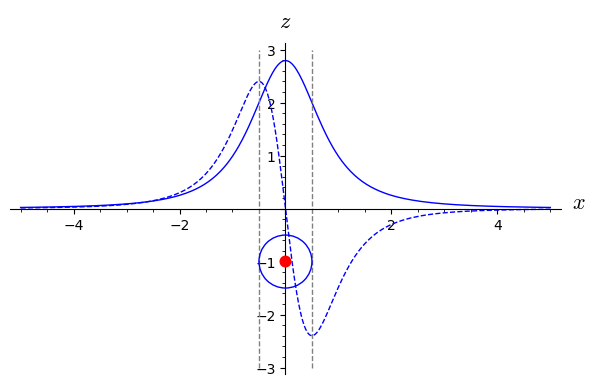

In [2]:
from sage.plot.circle import Circle

def gBall(x):
    G = 6.67#*10**(-11)
    r = 0.5
    p = 0.8
    M = p*(4/3)*np.pi*r**3
    h = 1
    return (G*M*h)/((x**2 + h**2)**(3/2))

def wBall(x):
    G = 6.67#*10**(-11)
    r = 0.5
    p = 0.8
    M = p*(4/3)*np.pi*r**3
    h = 1
    return -(3*G*M*h*x)/((x**2 + h**2)**(5/2))

g1 = Graphics()
var('x y z')
g1+= plot(gBall(x),(x,-5,5))
g1+= plot(wBall(x),(x,-5,5),linestyle = "--")
g1+= circle((0,-1),0.5)
g1+= circle((0,-1),0.1,fill=True, color = 'red')
g1+= line([(0.5,-3),(0.5,3)],linestyle = "--", color = 'gray')
g1+= line([(-0.5,-3),(-0.5,3)],linestyle = "--", color = 'gray')
g1.axes_labels(['$x$','$z$'])
g1

## Прямая задача для горизонтального кругового цилиндра

Пусть горизонтальный бесконечно длинный круговой цилиндр радиуса \\(R\\), сечения \\(s\\), с избыточной плотностью \\(\Delta\sigma\\) расположен вдоль оси \\(Y\\) на глубине \\(h\\). Решим прямую задачу, т. е. определим \\(\Delta g_гц\\) и \\(W_{XZ}\\) вдоль оси \\(X\\), направленной вкрест простирания цилиндра с началом координат над его центром. Притяжение цилиндром будет таким же, как притяжение вещественной линии, расположенной вдоль его оси с массой единицы длины \\(dm = \pi R2\\) \\(\Delta\sigma dy\\). Поэтому для точек наблюдения вдоль оси \\(X (y=z=0)\\) с учетом, что \\(х=0\\), \\(-\infty< y < \infty \\)(цилиндр считается бесконечно длинным), \\(z=h\\), аналитическое выражение можно получить из уравнения 1.1:

$$\Delta g_гц = G\Delta\sigma R^2\int^{+\infty}_{-\infty}\frac{dy}{(x^2+y^2+h^2)^{3/2}} = \frac{2GM_1 h}{x^2+h^2}$$

где \\(M_1 = \pi R^2\Delta\sigma\\) — избыточная масса единицы длины цилиндра. График \\(\Delta g_{гц}\\) будет иметь максимум \\(\Delta g_{max} = \frac{2GM_1}{h}\\) (при \\(х=0\\) и, как и \\(\Delta g_ш\\), асимптотически стремиться к нулю при \\(х → ± \infty\\). Очевидно, что в плане изолинии \\(\Delta g_{гц}\\) будут представлять систему параллельных оси цилиндра линий. В целом график \\(\Delta g_{гц}\\) и \\(W_{XZ}\\) вдоль оси \\(X\\) будет примерно таким же, как и над шаром.

$$W_{xz} = 	\frac{\partial(\Delta g_{гц})}{\partial x} = -\frac{4GMhx}{(x^2+h^2)^2}$$

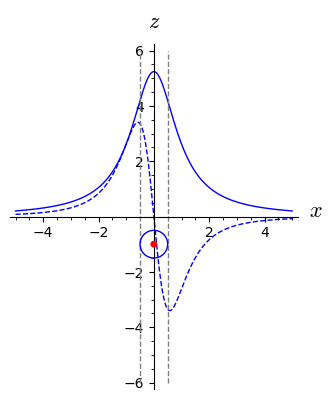

In [3]:
def gCylinder(x):
    G = 6.67#*10**(-11)
    r = 0.5
    p = 0.5
    M = p*np.pi*r**2
    h = 1
    return (2*G*M*h)/((x**2 + h**2))

def wCylinder(x):
    G = 6.67#*10**(-11)
    r = 0.5
    p = 0.5
    M = p*np.pi*r**2
    h = 1
    return -(4*G*M*h*x)/((x**2 + h**2)**(2))

g2 = Graphics()
var('x y z')

g2+= plot(gCylinder(x),(x,-5,5))
g2+= plot(wCylinder(x),(x,-5,5),linestyle = "--")
#g1+= plot(gBall(y),(y,-5,5))
g2+= circle((0,-1),0.5)
g2+= circle((0,-1),0.1,fill=True, color = 'red')
g2+= line([(0.5,-6),(0.5,6)],linestyle = "--", color = 'gray')
g2+= line([(-0.5,-6),(-0.5,6)],linestyle = "--", color = 'gray')
g2.axes_labels(['$x$','$z$'])
g2

## Прямая задача для вертикального уступа

Под вертикальным уступом в теории интерпретации гравитационных аномалий понимают горизонтальный полупласт, ограниченный вертикальной гранью, бесконечного простирания по оси \\(Y\\). Плотность пород уступа и вмещающих пород различна и составляет постоянную и отличную от нуля величину \\(\Delta\sigma\\). Если глубину верхней горизонтальной плоскости, ограничивающей полупласт, обозначить \\(h1\\), нижней — \\(h2\\), а боковую вертикальную грань совместить с осью \\(Z\\), то гравитационное поле \\(g_у\\) в точках \\(x\\) (вдоль оси \\(Х\\) при \\(z=0\\) и \\(y=0\\)) соответствует выражению 1.1 при определенных пределах интегрирования:

$$\Delta g_у(x) = G\Delta\sigma\pi \int_{0}^{\infty} \int_{-\infty}^{+\infty} \int_{h_1}^{h_2} \frac{\bar zd \bar xd \bar yd \bar z}{[(\bar x - x)^2 + \bar y^2 + \bar z^2]^{3/2}} = G\Delta\sigma\{ \bar xln\frac{x^2+h_2^2}{x^2+h_1^2} + \pi(h_2-h_1) + 2h_2arctg\frac{x}{h_2} - 2h_1arctg\frac{x}{h_1} \}$$

При \\(х → ± \infty\\) значения \\(\Delta g\\) выходят на горизонтальные асимптоты с максимальной аномалией \\(\Delta g_{max} = 2\pi G\Delta\sigma\Delta h\\). Над самим вертикальным сбросом (при \\(х=0\\)) получаем \\(\Delta g = (1/2)\\) \\(\Delta g_{max} = \pi G \Delta\sigma\Delta h\\). Очевидно, на карте \\(\Delta g_у\\) будут наблюдаться параллельные изолинии с максимальным сгущением изолиний над вертикальной гранью.

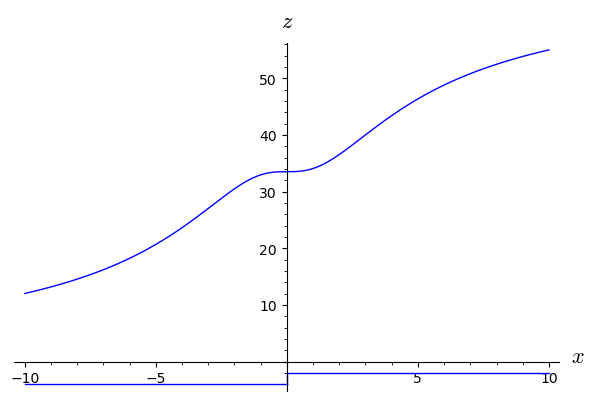

In [4]:
def gStep(x):
    G = 6.67#*10**(-11)
    p = 0.8
    x1 = 0
    h1 = 2
    h2 = 4
    return (G*p*(x1*np.log((x**2+h2**2)/(x**2+h1**2))+np.pi*(h2-h1)+2*h2*np.arctan(x/h2)-2*h1*np.arctan(x/h1)))

g3 = Graphics()
var('x y z')

g3+= plot(gStep(x),(x,-10,10))
#g2+= plot(wCylinder(x),(x,-5,5),linestyle = "--", color = 'grey')
#g1+= plot(gBall(y),(y,-5,5))
g3+= line([(0,-2), (10,-2)])
g3+= line([(0,-2), (0,-4)])
g3+= line([(0,-4), (-10,-4)])
#g3+= circle((0,-1),0.1,fill=True, color = 'red')
g3.axes_labels(['$x$','$z$'])
g3

Все графики увеличены для наглядности в \\(10^{11}\\) раз. Пример влияния шара плотность 0,8 и радиусом 0,5 без увеличения:

2.79392306659252e-11


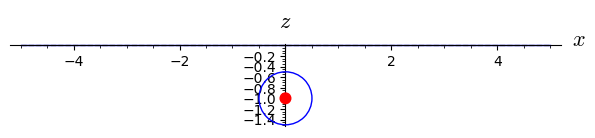

In [5]:
def gTrueBall(x):
    G = 6.67*10**(-11)
    r = 0.5
    p = 0.8
    M = p*(4/3)*np.pi*r**3
    h = 1
    return (G*M*h)/((x**2 + h**2)**(3/2))

def wTrueBall(x):
    G = 6.67*10**(-11)
    r = 0.5
    p = 0.8
    M = p*(4/3)*np.pi*r**3
    h = 1
    return -(3*G*M*h*x)/((x**2 + h**2)**(5/2))

g4 = Graphics()
var('x y z')
print(gTrueBall(0))
g4+= plot(gTrueBall(x),(x,-5,5))
g4+= plot(wTrueBall(x),(x,-5,5),linestyle = "--", color = 'grey')
g4+= circle((0,-1),0.5)
g4+= circle((0,-1),0.1,fill=True, color = 'red')
g4.axes_labels(['$x$','$z$'])
g4

## Класс матрицы

In [15]:
import numpy.linalg as linalg

class Matrix:           
    def __init__(self, arr):
        self.n = len(arr)
        self.m = len(arr[0])
        self.arr = arr
        
    def transpose(self):
        lst = np.zeros((self.m,self.n))
        for i in np.arange(len(lst)):
            for j in np.arange(len(lst[0])):
                lst[i][j] = self.arr[j][i]
        return Matrix(lst)
    
    
    def my_LU(self,b):     
        L  = np.zeros((self.n,self.n))
        U = np.copy(self.arr)
        
        for i in np.arange(self.n):
            for j in np.arange(i,self.n):
                L[j][i]=U[j][i]/U[i][i]
                
        for k in np.arange(1,self.n):
            for i in np.arange(k-1,self.n):
                for j in np.arange(i,self.n):
                    L[j][i]=U[j][i]/U[i][i]
                    
            for i in np.arange(k,self.n):
                for j in np.arange(k-1,self.n):
                    U[i][j]=U[i][j]-L[i][k-1]*U[k-1][j]
        
        print(L)
        print("-"*40)
        print(U)
        print(np.dot(L,U))
        
        return Matrix(L),Matrix(U)      
    
    
    def LUinv(self):
        A = Matrix(np.zeros((self.n,self.m)))
        #L = self.get_L()
        #U = self.get_U()
        L,U = self.my_LU(self.arr)
        for i in np.arange(self.n):
            Ei = Matrix(np.zeros((self.n, 1)))
            Ei.arr[i][0] = 1
            Yi = Matrix(linalg.solve(L.arr,Ei.arr))
            Ai = Matrix(linalg.solve(U.arr,Yi.arr))
            for j in np.arange(self.n):
                A.arr[j][i] = Ai.arr[j][0]
        return A
    
    def __invert__(self):  
        if self.n != self.m:
            print("INV: invalid size n != m")
            return Matrix(np.zeros((self.n,self.m)))
        if linalg.det(self.arr) == 0:
            print("INV: det = 0")
            return Matrix(np.zeros((self.n,self.m)))
        return self.LUinv()
    
    def __mul__(self, other):
        M = Matrix(np.zeros((self.n, other.m)))
        #print(self.m, other.n) 
        if other.n != self.m:
            print("MUL: invalid size m1 != n1")
            return M
        for i in np.arange(self.n):
            for j in np.arange(other.m):
                for r in np.arange(self.m):
                    M.arr[i][j] += self.arr[i][r]*other.arr[r][j]
                    #print(M.arr)
        return M
    
    def __add__(self,other):
        M = Matrix(np.zeros((self.n, self.m)))
        if self.n != other.n:
            print("ADD: invalid size n1 != n2")
            return M
        if self.m != other.m:
            print("ADD: invalid size m1 != m2")
            return M
        for i in np.arange(self.n):
            for j in np.arange(self.m):
                M.arr[i][j] = self.arr[i][j] + other.arr[i][j]
        return M
    
    def __sub__(self,other):
        M = Matrix(np.zeros((self.n, self.m)))
        if self.n != other.n:
            print("ADD: invalid size n1 != n2")
            return M
        if self.m != other.m:
            print("ADD: invalid size m1 != m2")
            return M
        for i in np.arange(self.n):
            for j in np.arange(self.m):
                M.arr[i][j] = self.arr[i][j] - other.arr[i][j]
        return M
    
a = Matrix(np.zeros((3,3)))


a.arr[0][0] = 2#10
#a.arr[0][1] = -7
#a.arr[0][2] = 0
#a.arr[1][0] = -3
a.arr[1][1] = 3#6
#a.arr[1][2] = 2
#a.arr[2][0] = 5
a.arr[2][1] = 6#-1
a.arr[2][2] = 5#5





#print(a.my_LU(a.arr))

b = ~a

#print((a.get_L() * a.get_U()).arr)

print(b.arr)
print((a*b).arr)
print("-"*40)
#print((a * b).arr)
print(linalg.inv(a.arr))
print(np.dot(a.arr,linalg.inv(a.arr)))
#print((a * b).arr)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 2. 1.]]
----------------------------------------
[[2. 0. 0.]
 [0. 3. 0.]
 [0. 0. 5.]]
[[2. 0. 0.]
 [0. 3. 0.]
 [0. 6. 5.]]
[[ 0.5         0.          0.        ]
 [ 0.          0.33333333  0.        ]
 [-0.         -0.4         0.2       ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
----------------------------------------
[[ 0.5         0.          0.        ]
 [ 0.          0.33333333  0.        ]
 [-0.         -0.4         0.2       ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## Обратная задача гравиразведки

Задоно гравитационное поле в \\(N\\) точках по профилю с некоторым шагом, есть сеточная модель плотностей, состоящая из ячеек, размером \\(MN\\). Нужно найти плотности всех ячеек, получается система уравнений

\begin{cases}
    \Delta g_1 = \Delta g_{111}\sigma_{11} + \Delta g_{112}\sigma_{12} + \dots + \Delta g_{1jk}\sigma_{jk} + \dots + \Delta g_{1MN}\sigma_{MN}\\
    \Delta g_2 = \Delta g_{211}\sigma_{11} + \Delta g_{212}\sigma_{12} + \dots + \Delta g_{2jk}\sigma_{jk} + \dots + \Delta g_{2MN}\sigma_{MN}\\
    \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots\\
    \Delta g_i = \Delta g_{i11}\sigma_{11} + \Delta g_{i12}\sigma_{12} + \dots + \Delta g_{ijk}\sigma_{jk} + \dots + \Delta g_{iMN}\sigma_{MN}\\
    \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots\\
    \Delta g_N = \Delta g_{N11}\sigma_{11} + \Delta g_{N12}\sigma_{12} + \dots + \Delta g_{Njk}\sigma_{jk} + \dots + \Delta g_{NMN}\sigma_{MN}\\
\end{cases}

где, \\(\Delta g_i\\) - значение аномалиии гравитационного поля в \\(i-ой\\) точке профиля;   
\\(\sigma_{jk}\\) - плотность \\(jk-й\\) ячейки;    
\\(\Delta g_{ijk}\\) - гравитационное поле \\(jk-й\\) ячейки с единичной плотностью в \\(i-й\\) точке профиля.

Аномалии гравитационного поля в каждой точке складываются из аномалий, создоваемых каждой ячейкой;    
СЛАУ для сеточной модели недоопределена и имеет бесконечное число решений т.к количество неизвестных больше чем количество уравнений.

$$\Delta g = G\sigma \left( (\xi - x) ln((\xi - x)^2 + (\zeta - z)^2) + 2(\zeta - z)arctg\frac{\xi -x}{\zeta -z}) \right)\Big|^{\xi_2 , \zeta_2}_{\xi_1 , \zeta_1}  $$

$$\Delta g_{ijk} = G\left( (\xi_{jk} - x_i) ln((\xi_{jk} - x_i)^2 + (\zeta_{jk} - z_i)^2) + 2(\zeta_{jk} - z_i)arctg\frac{\xi_{jk} -x_i}{\zeta_{jk} -z_i}) \right)\Big|^{\xi_{2jk} , \zeta_{2jk}}_{\xi_{1jk} , \zeta_{1jk}}  $$

СЛАУ можно записать в матричнои виде: \\(\Delta g\\) - вектор столбец наблюденных аномалий силы тяжести, \\(A\\) - оператор прямой задачи, \\(\sigma\\) - вектор столбец плотностей.

$$ A\sigma = \Delta g$$


$$A = 
 \begin{pmatrix}
  \Delta g_{111} & \Delta g_{112} & \cdots & \Delta g_{1jk} & \cdots & \Delta g_{1NM}\\
  \Delta g_{211} & \Delta g_{212} & \cdots & \Delta g_{2jk} & \cdots & \Delta g_{2NM}\\
  \cdots & \cdots & \cdots & \cdots & \cdots & \cdots\\
  \Delta g_{i11} & \Delta g_{i12} & \cdots & \Delta g_{ijk} & \cdots & \Delta g_{iNM}\\
  \cdots & \cdots & \cdots & \cdots & \cdots & \cdots\\
  \Delta g_{N11} & \Delta g_{N12} & \cdots & \Delta g_{Njk} & \cdots & \Delta g_{NNM}
 \end{pmatrix}
$$

$$\sigma = 
 \begin{pmatrix}
  \sigma_{11}\\
  \sigma_{12}\\
  \cdots \\
  \sigma_{21}\\
  \sigma_{22}\\
  \cdots \\
  \sigma_{ij}\\
  \cdots \\
  \sigma_{MN}
 \end{pmatrix}
$$

$$\Delta g = 
 \begin{pmatrix}
  \Delta g_{1}\\
  \Delta g_{2}\\
  \cdots \\
  \Delta g_{i}\\
  \cdots \\
  \Delta g_{N}
 \end{pmatrix}
$$

Матрица \\(A\\) не квадратная, обратная задача решается путем минимизации функционала невязки \\(L\\), минимум функционала - градиент равен нулю.
$$ L = ||A\sigma -\Delta g||^2 \to min$$
$$ \nabla L = 2A^T(A\sigma - \Delta g) = 0 $$
$$ \sigma = (A^T A)^{-1}A^T \Delta g $$

[[6.67000000e-11 2.35820112e-11 5.96582936e-12 2.10923920e-12
  9.51595658e-13 1.66750000e-11 1.19316587e-11 5.89550279e-12
  2.84603870e-12 1.49145734e-12 7.41111111e-12 6.32771760e-12
  4.26905805e-12 2.62022346e-12 1.60080000e-12 4.16875000e-12
  3.80638263e-12 2.98291468e-12 2.13440000e-12 1.47387570e-12
  2.66800000e-12 2.51556658e-12 2.13549639e-12 1.68219936e-12
  1.27034023e-12]
 [2.35820112e-11 6.67000000e-11 2.35820112e-11 5.96582936e-12
  2.10923920e-12 1.19316587e-11 1.66750000e-11 1.19316587e-11
  5.89550279e-12 2.84603870e-12 6.32771760e-12 7.41111111e-12
  6.32771760e-12 4.26905805e-12 2.62022346e-12 3.80638263e-12
  4.16875000e-12 3.80638263e-12 2.98291468e-12 2.13440000e-12
  2.51556658e-12 2.66800000e-12 2.51556658e-12 2.13549639e-12
  1.68219936e-12]
 [5.96582936e-12 2.35820112e-11 6.67000000e-11 2.35820112e-11
  5.96582936e-12 5.89550279e-12 1.19316587e-11 1.66750000e-11
  1.19316587e-11 5.89550279e-12 4.26905805e-12 6.32771760e-12
  7.41111111e-12 6.32771760e-12 4.

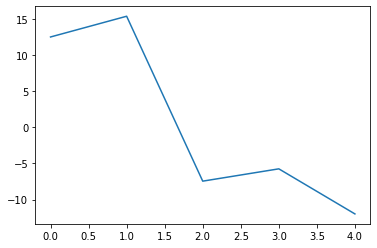

In [7]:
import numpy.linalg as linalg
global M, N, A, G, SigmaR, Sigma, DeltaG, DeltaG_line

G = 6.67*10**(-11)
M = 5
N = 5


def create_A():
    A = np.zeros((N,M*N))
    for k in np.arange(N):
        xi = k
        zi = 0
        for z in np.arange(1,N+1):
            for x in np.arange(M):
                Xi_1 = x-0.5
                Zeta_1 = -z-0.5
                Xi_2 = x+0.5
                Zeta_2 = -z+0.5
                
                left = (Xi_1-xi)*np.log((Xi_1 - xi)**2 + (Zeta_1 - zi)**2) + 2*(Zeta_1 - zi)*arctan((Xi_1 - xi)/(Zeta_1 - zi))
                right = (Xi_2-xi)*np.log((Xi_2 - xi)**2 + (Zeta_2 - zi)**2) + 2*(Zeta_2 - zi)*arctan((Xi_2 - xi)/(Zeta_2 - zi))
                    
                A[k][x+((z-1)*M)] = (right - left)
    return A

def create_A_my():
    A = np.zeros((N,M*N))
    for k in np.arange(N):
        xi = k
        zi = 0
        for z in np.arange(1,N+1):
            for x in np.arange(M):
                r = sqrt((zi+z)**2+(x-xi)**2)  
                A[k][x+((z-1)*M)] = G*((zi+z)/(r**3))#(right + left)
    return A

def vector_random_model():
    SigmaR = np.zeros((N*M,1))
    for i in np.arange(N*M):
        SigmaR[i][0] = np.random.random()
    return SigmaR

def calculate_Delta_g(A,Sigma):
    return DeltaG

def create_line(list, n):
    line = np.zeros(n)
    for i in np.arange(n):
        line[i] = list[i][0]
    return line

A = create_A_my()
#SigmaR = vector_random_model()
DeltaG = np.array([[1],[2],[3],[4],[5]])#np.dot(A,SigmaR)


print(A)
#print(create_line(SigmaR, N*M))
#print(Delta_g )
#print(DeltaG_line )
AT = A.transpose()
#Sigma = linalg.lstsq(A,DeltaG[, rcond])
Sigma = np.dot(linalg.inv((np.dot(AT,A))),np.dot(AT,DeltaG))

#print(create_line(Sigma, M*N))

#p1 = plt.plot(np.arange(N),DeltaG_line)
#p1.show()

print(create_line(DeltaG, M))
print(np.dot(2*AT,(np.dot(A,Sigma)-DeltaG)))

DeltaG = np.dot(A,Sigma)

print(create_line(DeltaG, M))
DeltaG_line = create_line(DeltaG, M)
print(np.dot(2*AT,(np.dot(A,Sigma)-DeltaG)))

plt.plot(np.arange(N),DeltaG_line)




#g6 = Graphics()
#var('x y z')
#g6+= plot(DeltaG_line,np.arange(N))
#g4+= plot(wTrueBall(x),(x,-5,5),linestyle = "--", color = 'grey')
#g5+= circle((0,-1),0.5)
#g5+= circle((0,-1),0.1,fill=True, color = 'red')
#g6.axes_labels(['$x$','$z$'])
#g6